In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving dataset_malwares.csv to dataset_malwares.csv


{'dataset_malwares.csv': b'Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,Sectio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df=pd.read_csv('dataset_malwares.csv')

In [ ]:
a=0
for column in df.columns:
  if(df[column].isnull().sum()!=0):
    a=1

In [ ]:
df

Name  ...  ImageDirectoryEntrySecurity
0      VirusShare_a878ba26000edaac5c98eff4432723b3  ...                            0
1      VirusShare_ef9130570fddc174b312b2047f5f4cf0  ...                       346112
2      VirusShare_ef84cdeba22be72a69b198213dada81a  ...                            0
3      VirusShare_6bf3608e60ebc16cbcff6ed5467d469e  ...                     14109472
4      VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb  ...                        90624
...                                            ...  ...                          ...
19606                                     clip.exe  ...                            0
19607                 VNC-Server-6.2.0-Windows.exe  ...                     18855424
19608      Microsoft.GroupPolicy.Management.ni.dll  ...                            0
19609                            cryptuiwizard.dll  ...                            0
19610                                  winhttp.dll  ...                            0

[19611 rows x 79 columns]

In [ ]:
df['Name'].value_counts()

VirusShare_a878ba26000edaac5c98eff4432723b3    1
VirusShare_e04dca7e542cad261c750cfa2a9c71bf    1
VirusShare_52b59b899fca8528f983167687221c15    1
VirusShare_efd01dea30b400b9dee8d1c1cc50f279    1
VirusShare_10e2d0328f5435127f76a9b8b2c4ecfe    1
                                              ..
VirusShare_cf09f6967a9232884745e48c5d85a5d7    1
VirusShare_efb096a10faecdcbc6e1cff363407a80    1
VirusShare_efad2552857c275be91d01ce48272b30    1
VirusShare_efbc6d33059c3de520bd840ec0c7f960    1
winhttp.dll                                    1
Name: Name, Length: 19611, dtype: int64

In [ ]:
df=df.drop(['Name'],axis=1)

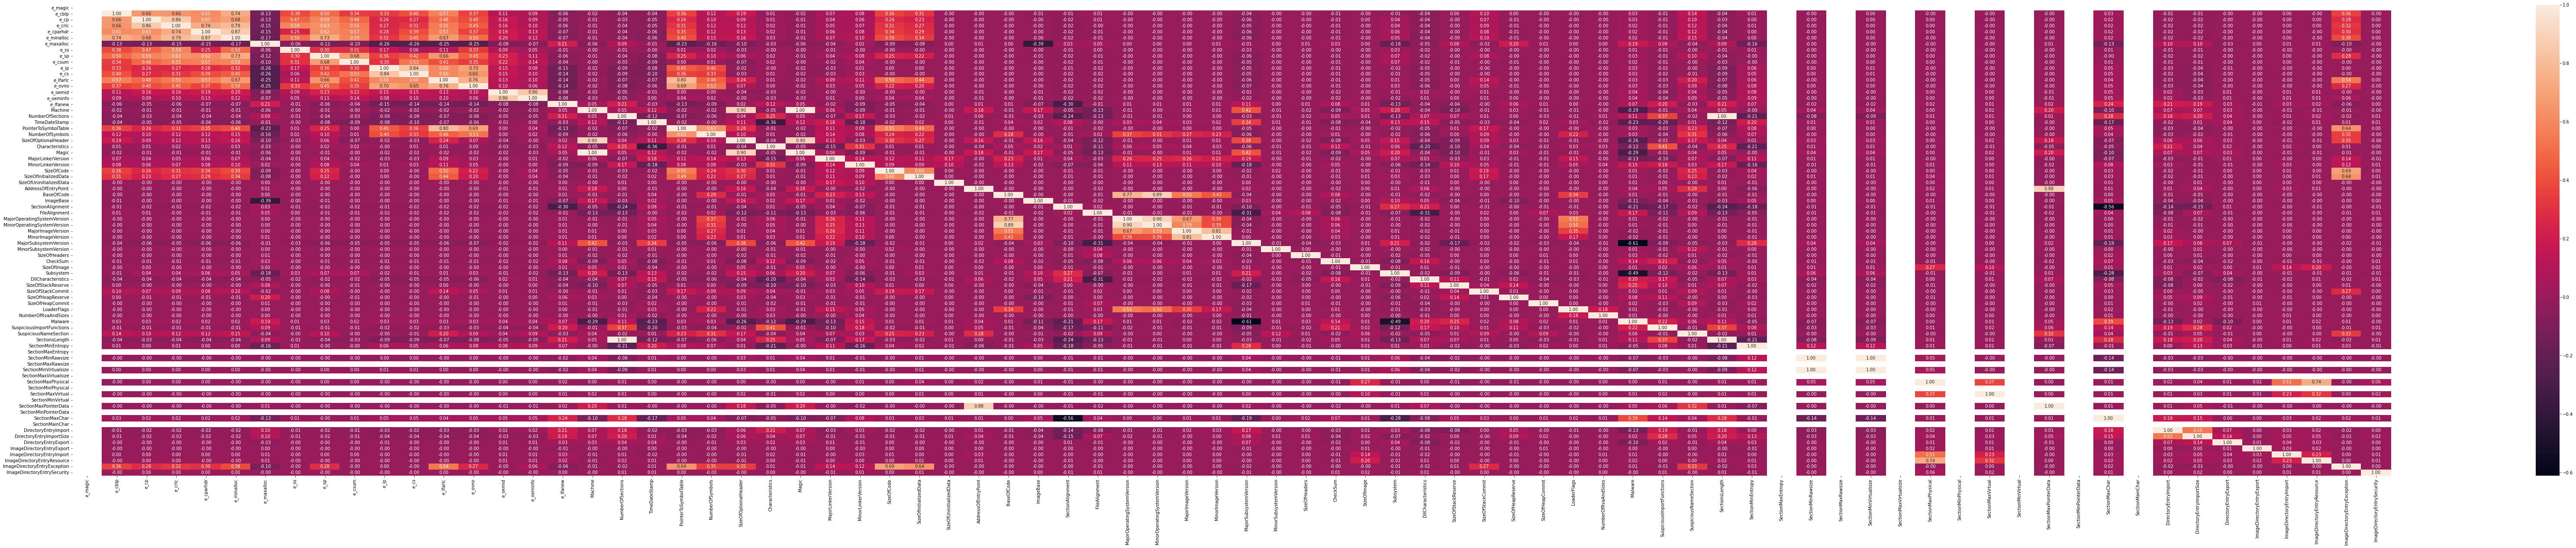

In [ ]:
corelation=df.corr()
plt.figure(figsize=(120,30))
sns.heatmap(corelation,annot=True,fmt='0.2f')

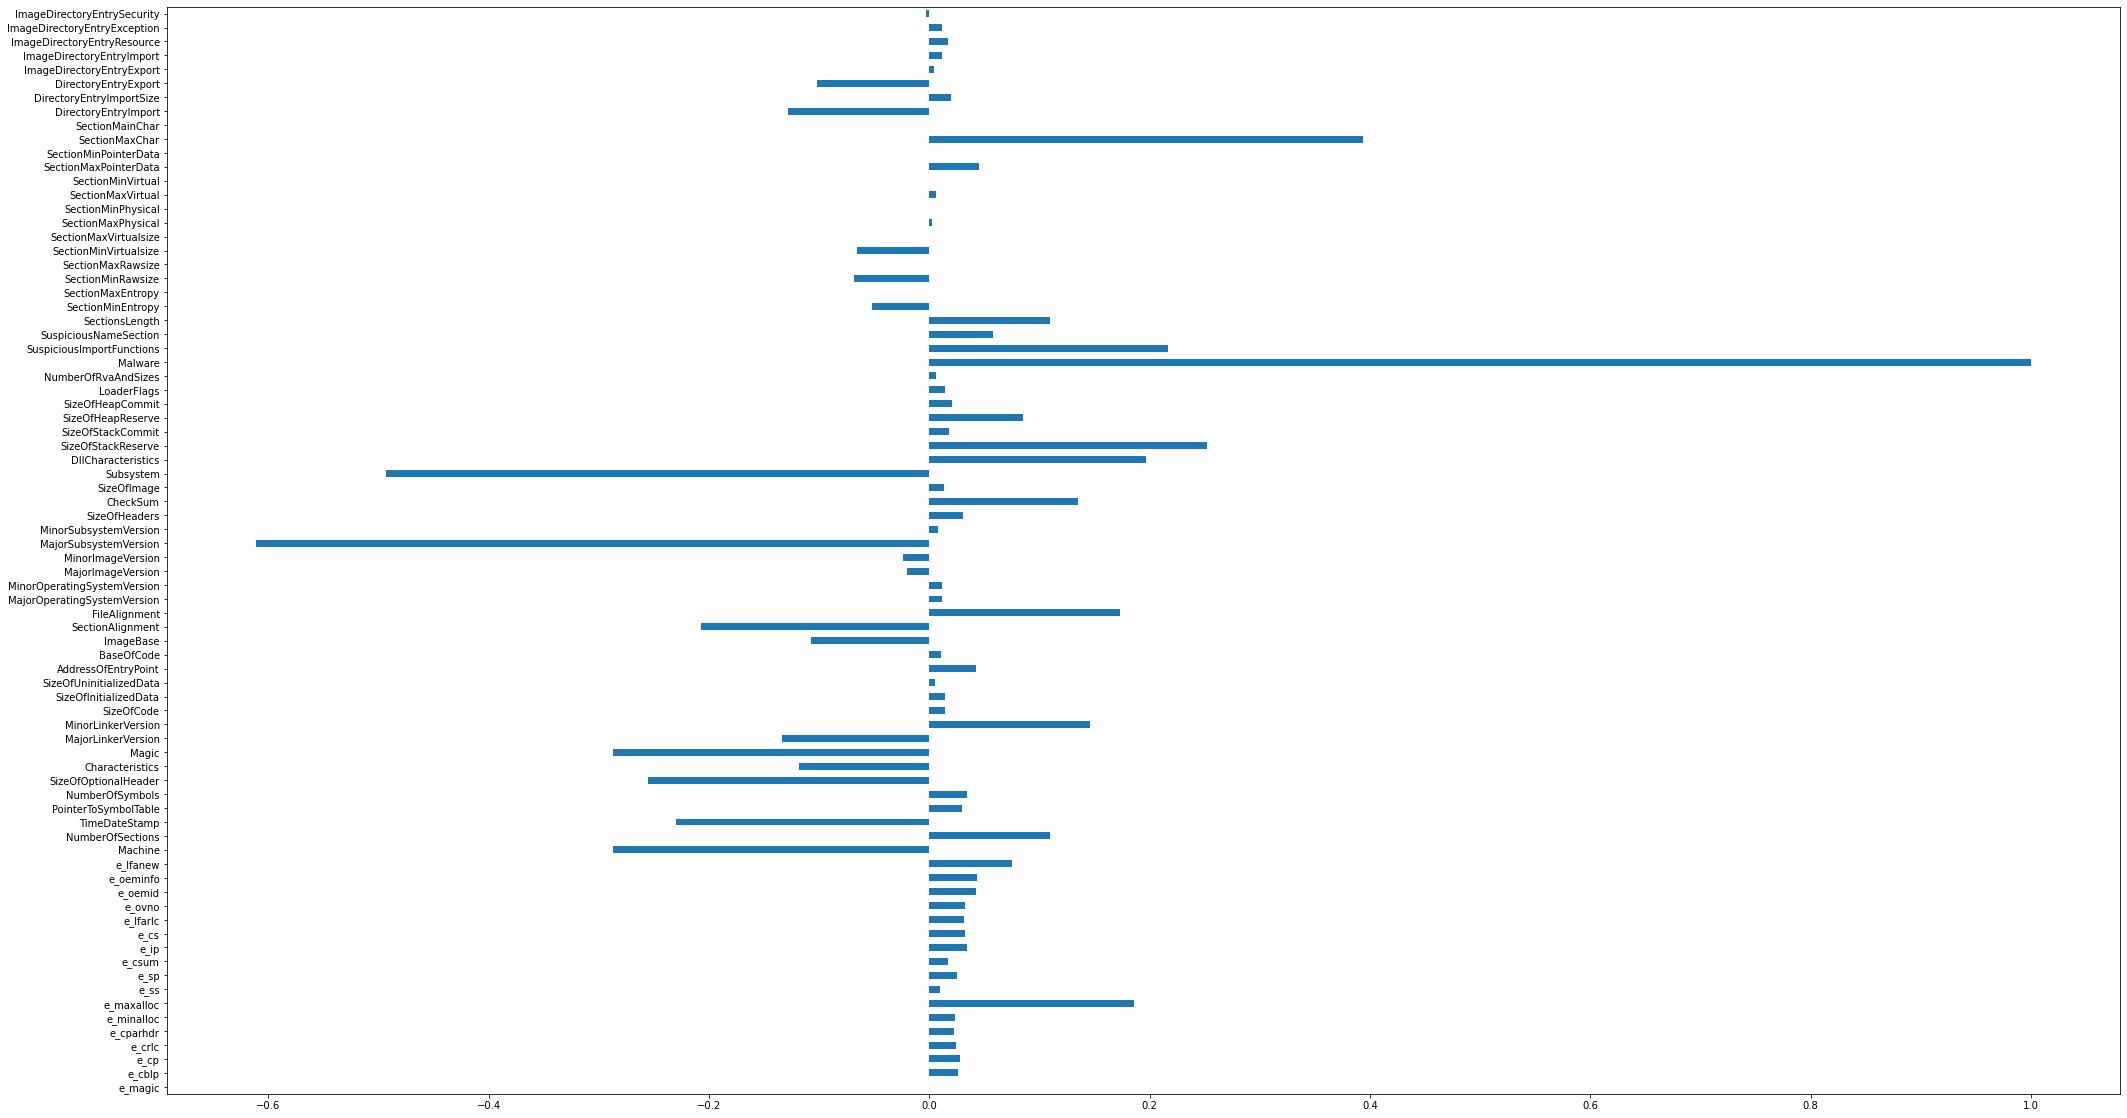

In [ ]:
plt.figure(figsize=(35,20))
pd.Series(df.corr()['Malware']).plot(kind='barh')

In [ ]:
df.shape

(19611, 78)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 56 58 60 62 64 66 68] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


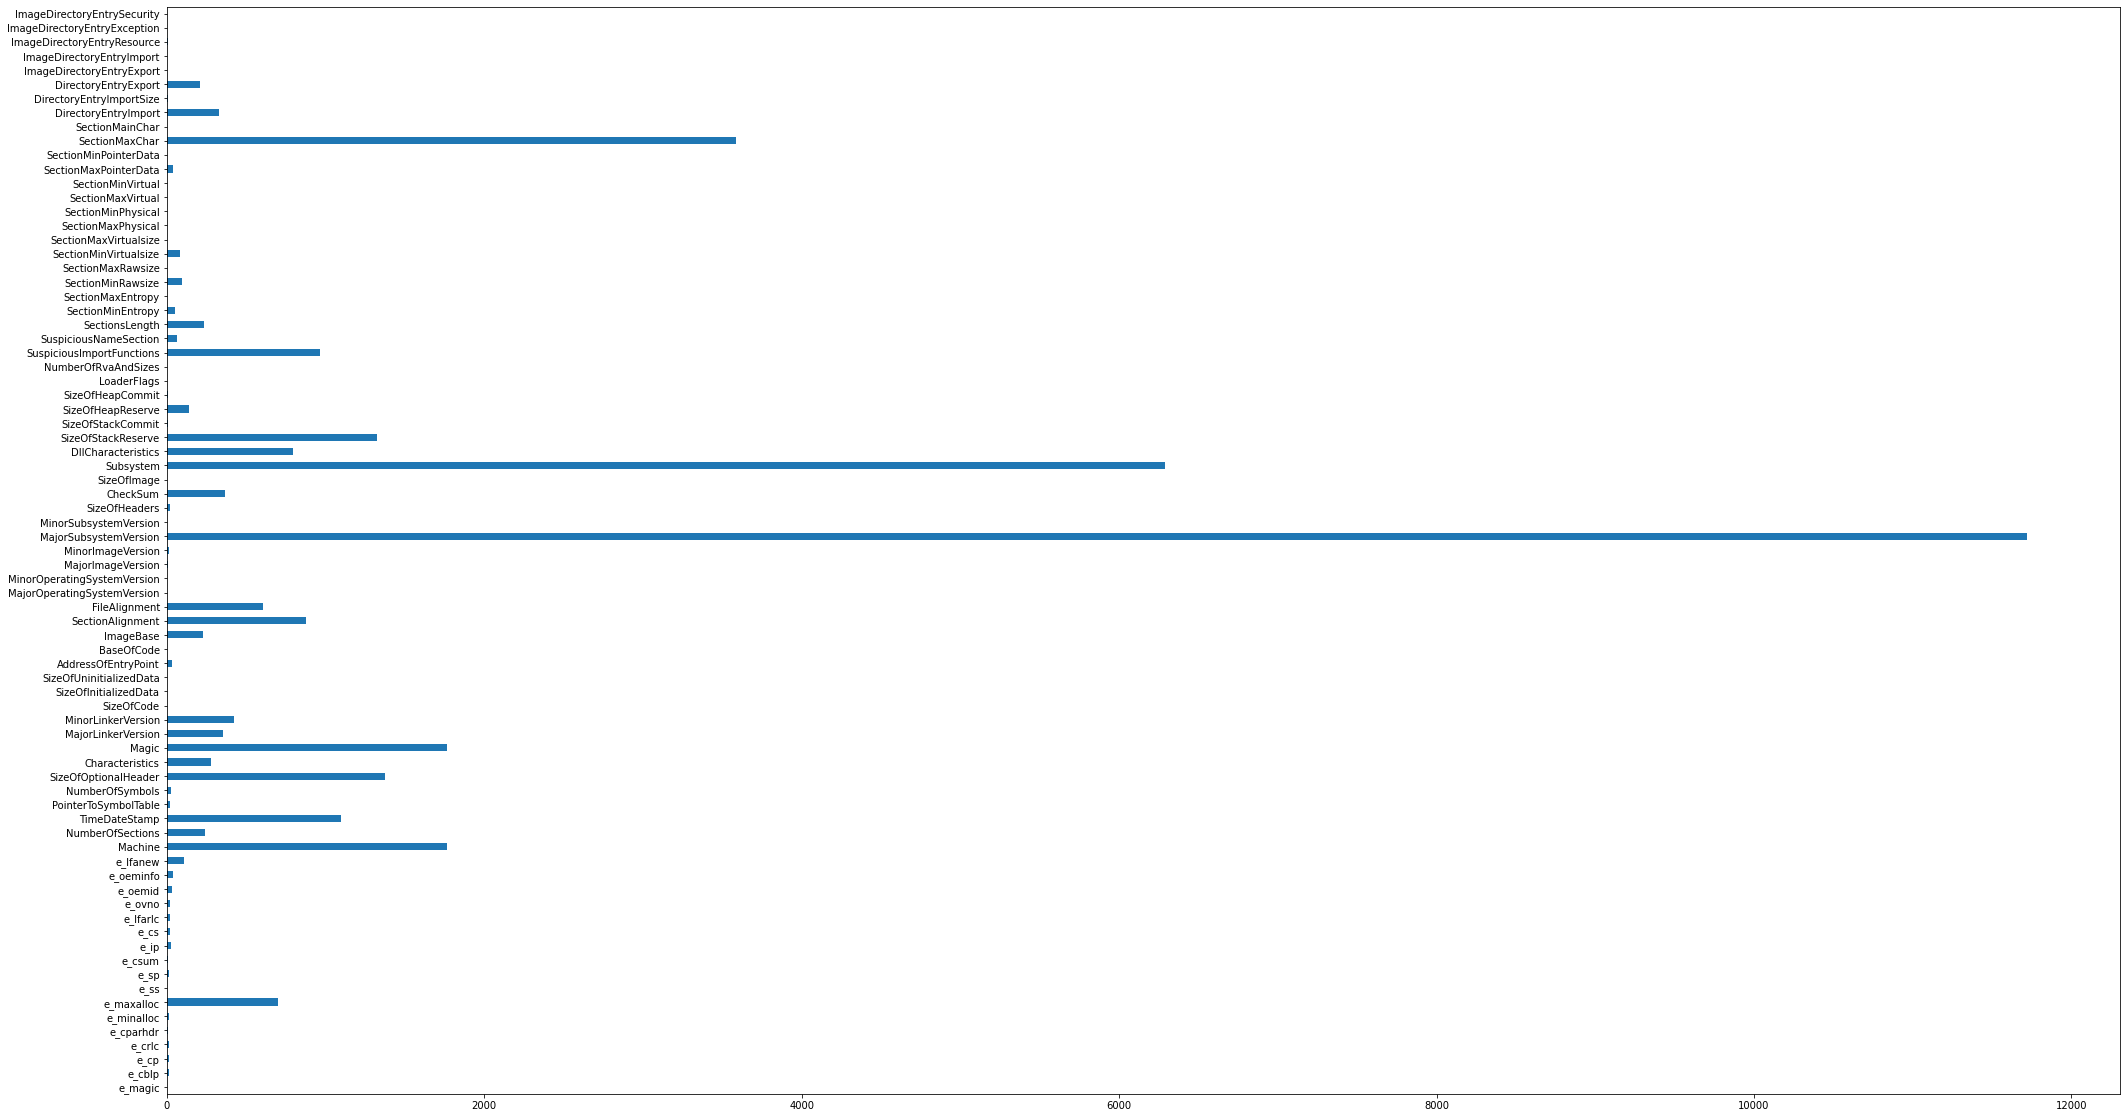

In [ ]:
x=df.drop(['Malware'],axis=1)
y=df['Malware']
Feature=SelectKBest()
Feature.fit(x,y)
plt.figure(figsize=(35,20))
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [ ]:
top=pd.Series(Feature.scores_,index=x.columns).nlargest(45).keys()

In [ ]:
x=df[top]

In [ ]:
Adaboost=AdaBoostClassifier(n_estimators=110)
KNN=KNeighborsClassifier(n_neighbors=225)
Forest=RandomForestClassifier(n_estimators=110)
Tree=DecisionTreeClassifier()
LGB=LGBMClassifier()
XGB=XGBClassifier()
GNB=GaussianNB()
BNB=BernoulliNB()
LR=LogisticRegression()
LDA=LinearDiscriminantAnalysis()
SVM=SVC(gamma='auto')

In [ ]:
Algo=[Adaboost,KNN,Forest,Tree,LGB,XGB,GNB,BNB,LR,LDA]

In [ ]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [ ]:
Scores=[]
Averages=[]
for i in Algo:
  cv_score=cross_val_score(i,Scaled_x,y,cv=3)
  Scores.append(cv_score)
  Averages.append(cv_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
Algo_name=pd.DataFrame(["Adaboost","KNN","Forest","Tree","LGB","XGB","GNB","BNB","LR","LDA"],columns=['Algo_name'])
Scores=pd.DataFrame(Scores)
Averages=pd.DataFrame(Averages,columns=['Averages'])

In [ ]:
Table=pd.concat([Algo_name,Scores],axis=1)
Table=pd.concat([Table,Averages],axis=1)
Table

Algo_name         0         1         2  Averages
0  Adaboost  0.987150  0.986691  0.985314  0.986385
1       KNN  0.948600  0.942328  0.947223  0.946051
2    Forest  0.992351  0.991892  0.989904  0.991382
3      Tree  0.986538  0.988068  0.986079  0.986895
4       LGB  0.992657  0.991739  0.991433  0.991943
5       XGB  0.990210  0.989751  0.989445  0.989802
6       GNB  0.436133  0.438427  0.436745  0.437102
7       BNB  0.941104  0.936362  0.933303  0.936923
8        LR  0.963439  0.954107  0.960991  0.959513
9       LDA  0.950283  0.949212  0.953343  0.950946

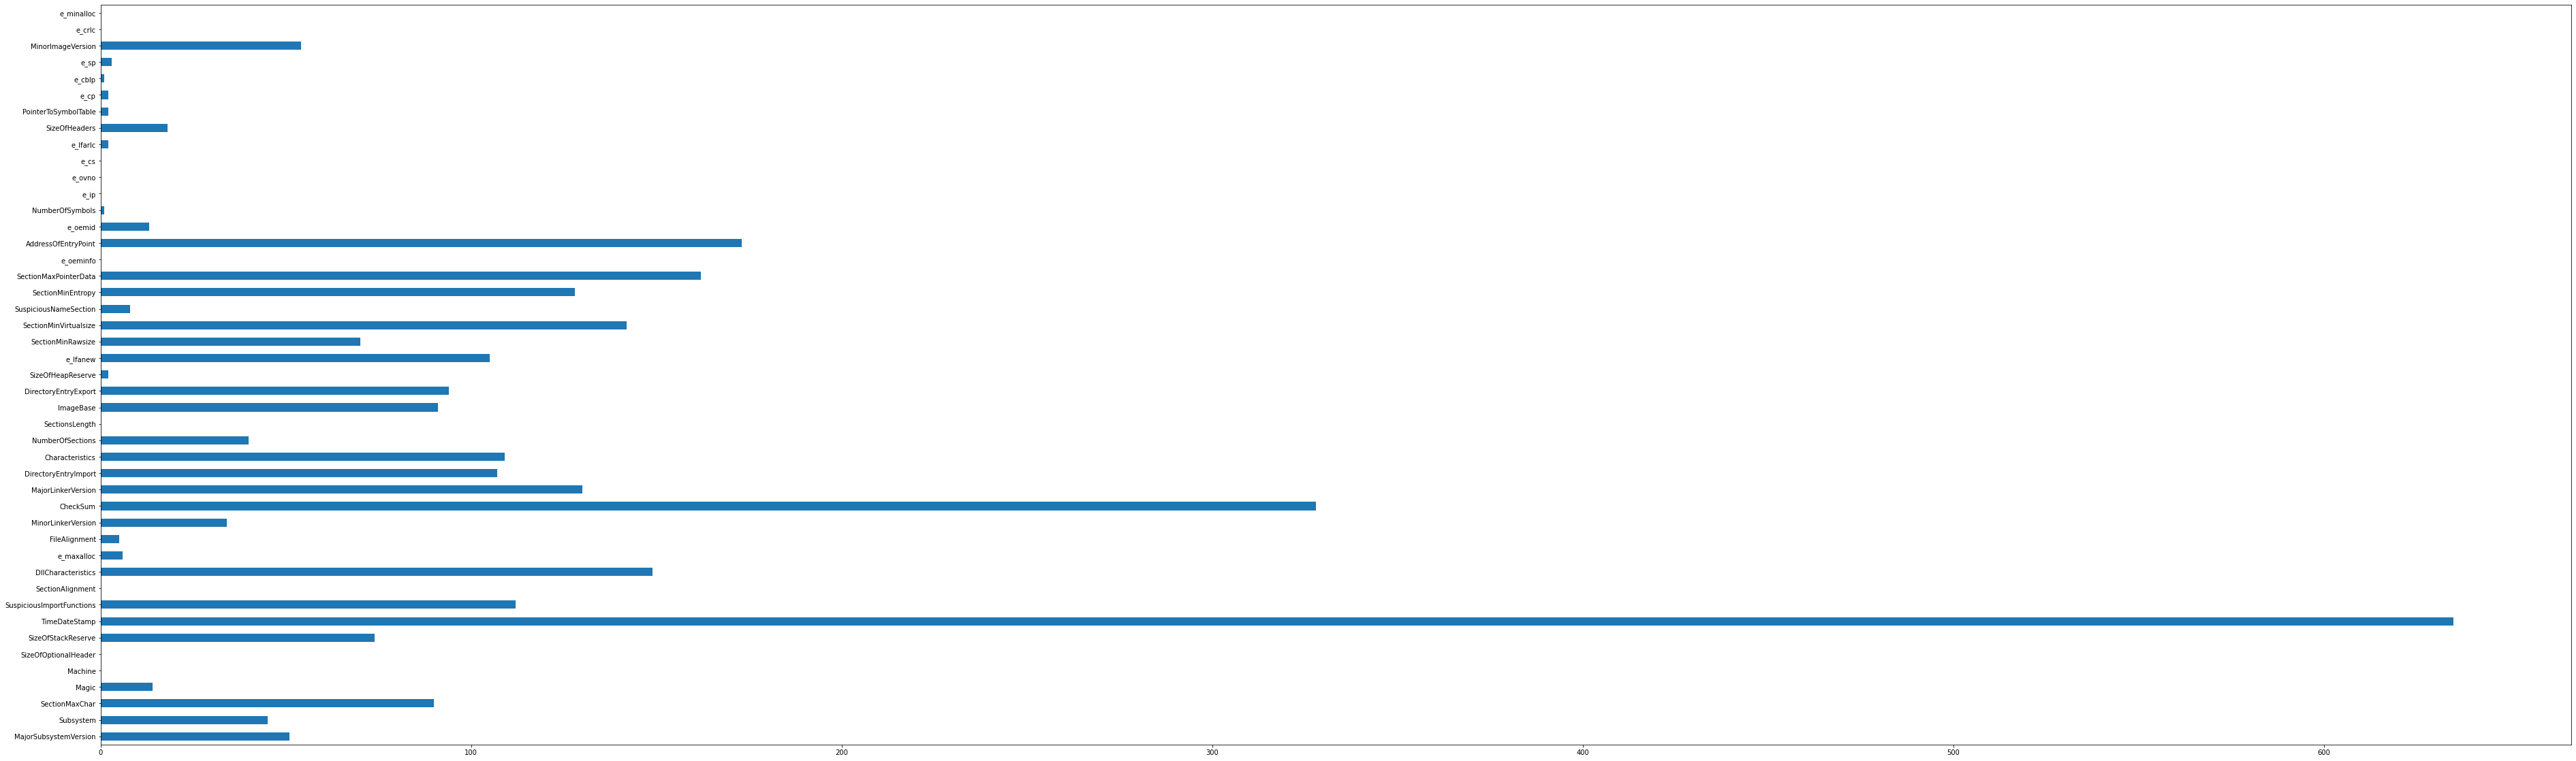

In [ ]:
LGB.fit(x,y)
plt.figure(figsize=(65,20))
pd.Series(LGB.feature_importances_,index=x.columns).plot(kind='barh')

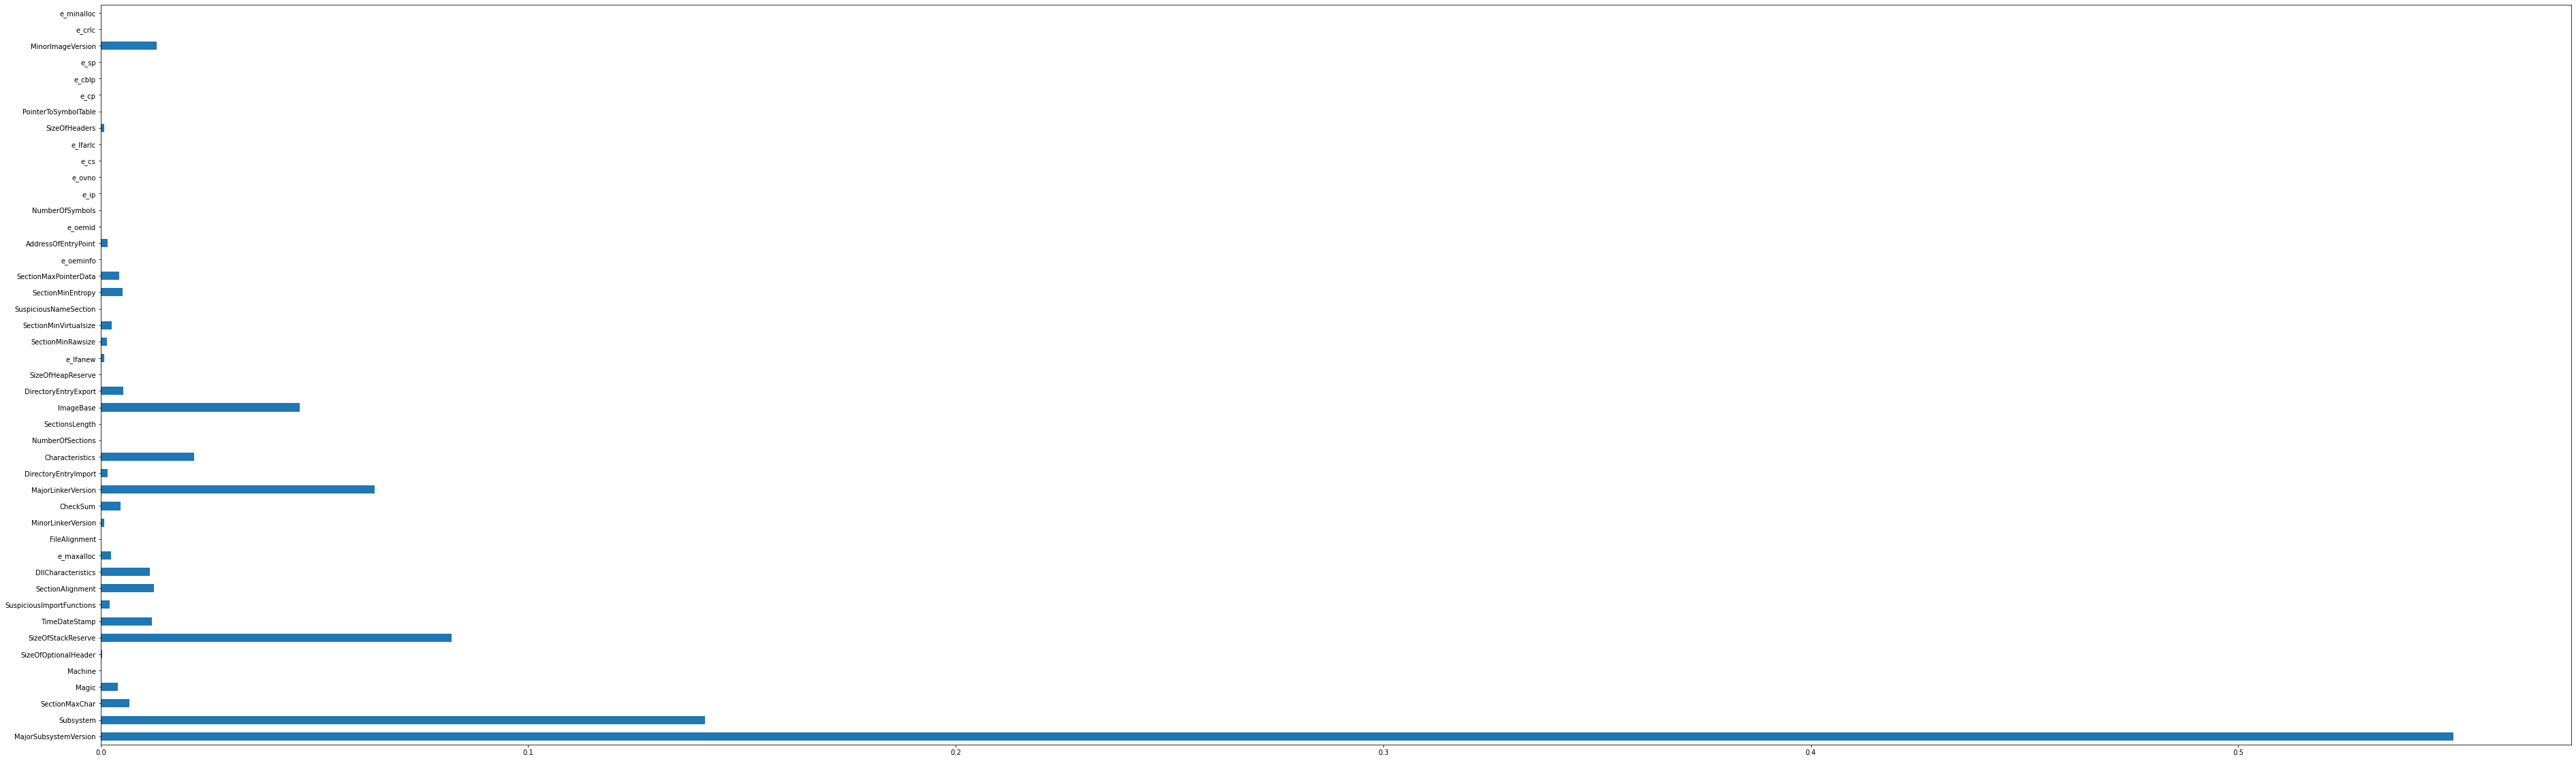

In [ ]:
XGB.fit(x,y)
plt.figure(figsize=(65,20))
pd.Series(XGB.feature_importances_,index=x.columns).plot(kind='barh')

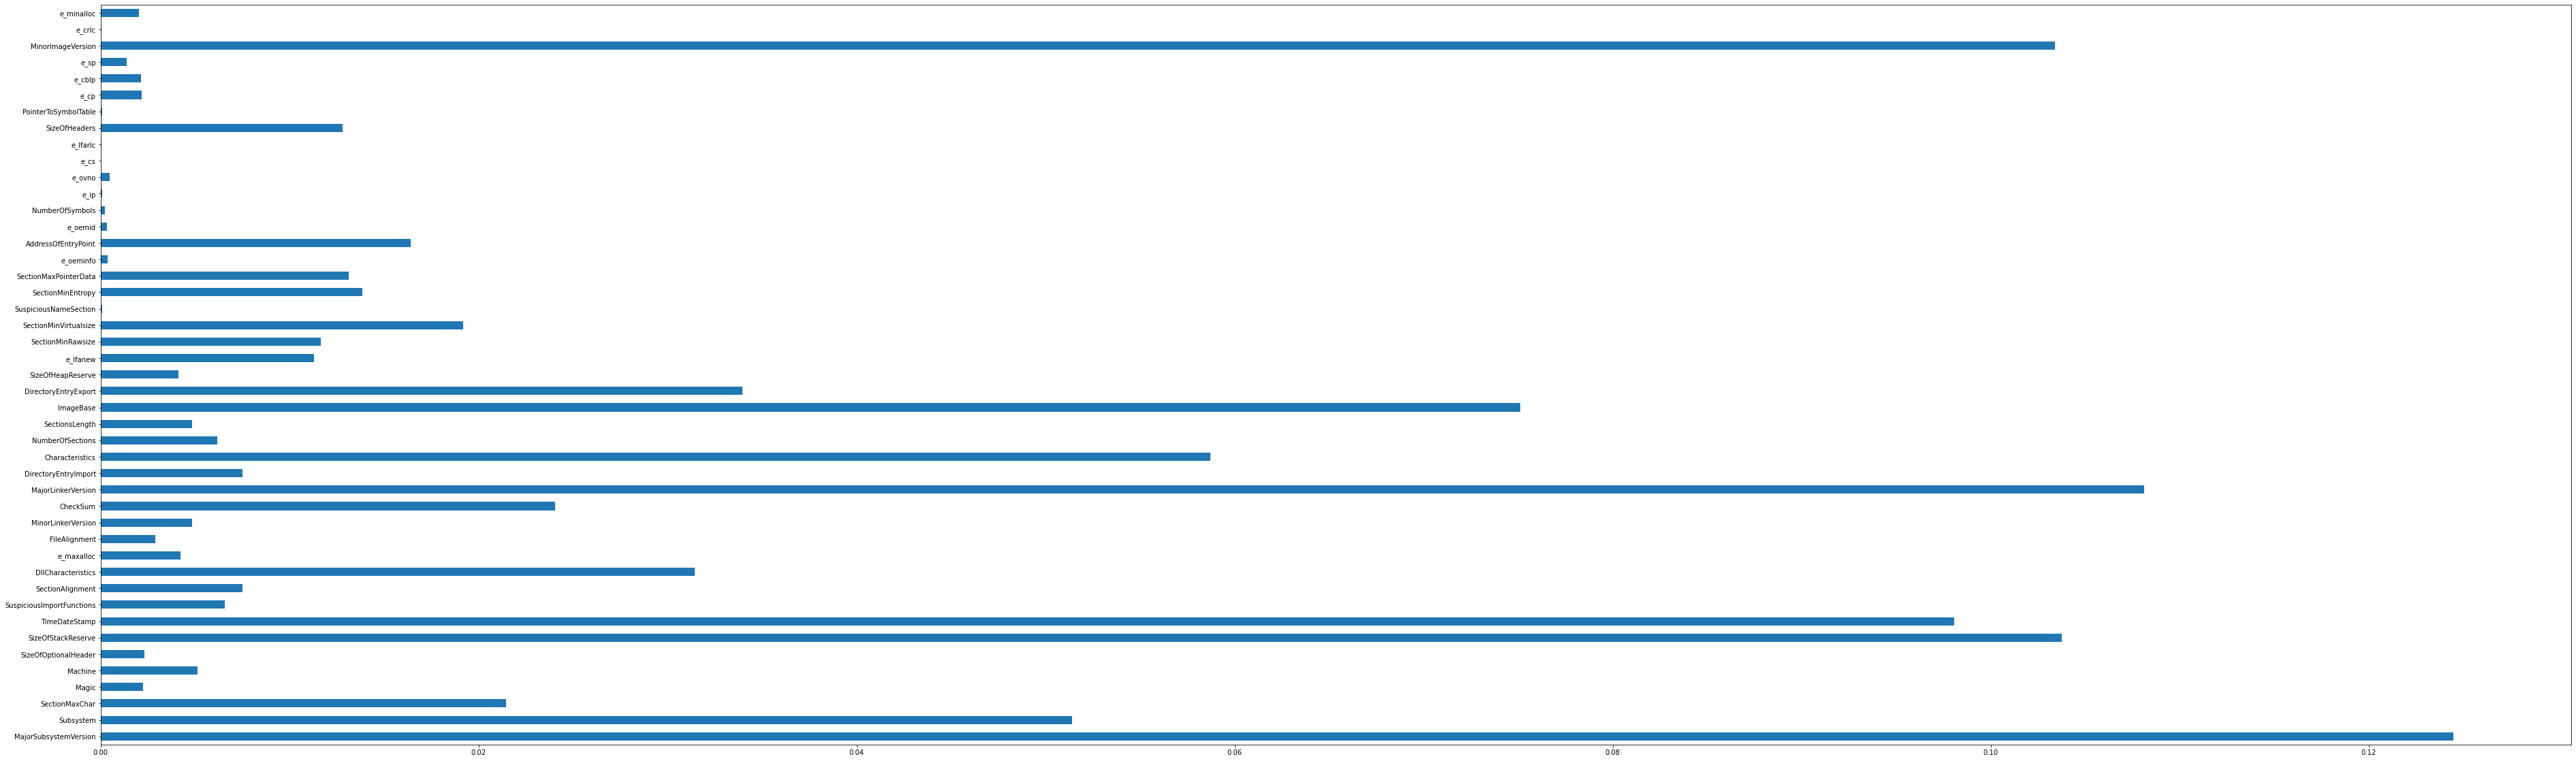

In [ ]:
Forest.fit(x,y)
plt.figure(figsize=(65,20))
pd.Series(Forest.feature_importances_,index=x.columns).plot(kind='barh')

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [ ]:
LGB.fit(xtrain,ytrain)
LGB.score(xtest,ytest)

0.9931175121080805

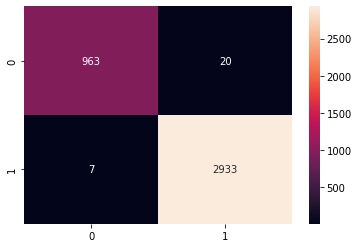

In [ ]:
pred=LGB.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [ ]:
Stacking=StackingClassifier([("Adaboost",Adaboost),("KNN",KNN),("Forest",Forest),("Tree",Tree),("LGB",LGB),("XGB",XGB),("GNB",GNB),("BNB",BNB),("LR",LR),("LDA",LDA)],final_estimator=LGB)
Stacking.fit(xtrain,ytrain)
Stacking.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9938822329849605

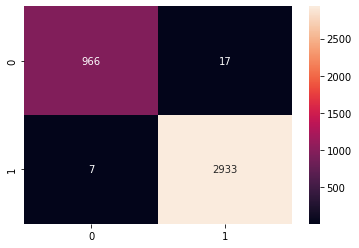

In [ ]:
pred=Stacking.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [ ]:
Voting=VotingClassifier([("Tree",Tree),("LGB",LGB),("XGB",XGB)])
Voting.fit(xtrain,ytrain)
Voting.score(xtest,ytest)

0.9938822329849605

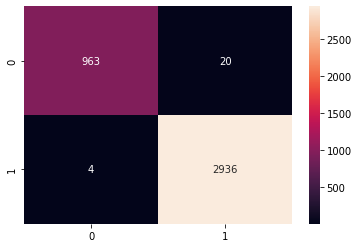

In [ ]:
pred=Voting.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [ ]:
df

e_magic  ...  ImageDirectoryEntrySecurity
0        23117  ...                            0
1        23117  ...                       346112
2        23117  ...                            0
3        23117  ...                     14109472
4        23117  ...                        90624
...        ...  ...                          ...
19606    23117  ...                            0
19607    23117  ...                     18855424
19608    23117  ...                            0
19609    23117  ...                            0
19610    23117  ...                            0

[19611 rows x 78 columns]

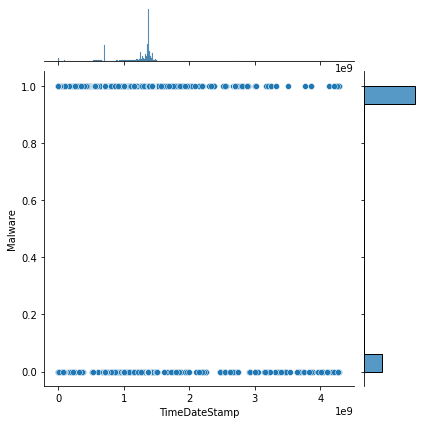

In [ ]:
sns.jointplot(x='TimeDateStamp',y='Malware',data=df)

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(LGB, gridParams, verbose=1,cv=2, n_jobs=-1)
grid.fit(xtrain,ytrain)
grid.score(xtest,ytest)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


0.7494264593423401